In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = sns.load_dataset('titanic')

In [5]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


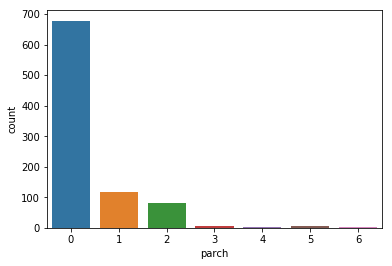

In [12]:
sns.countplot(x='parch',data=train)

In [5]:
train['parch'].ipynb_checkpoints/

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df = train.drop(['who','embark_town','class','alive'],axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,True


## Exploratory Data Analysis

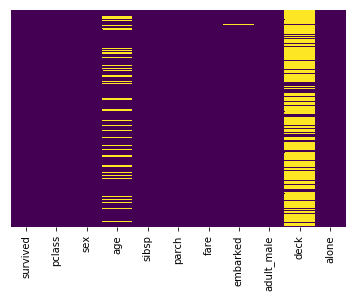

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

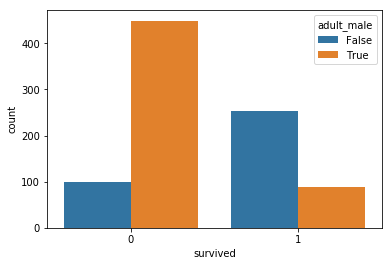

In [9]:
# Jumlah penumpang selamat menurut 'adult_male'
sns.countplot(x='survived',hue='adult_male',data=df)

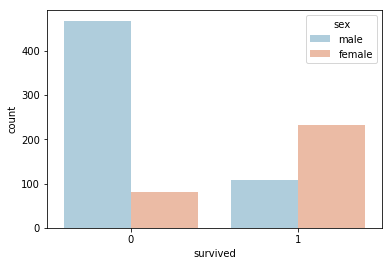

In [10]:
# Jumlah penumpang selamat terbagi dalam 'sex'
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

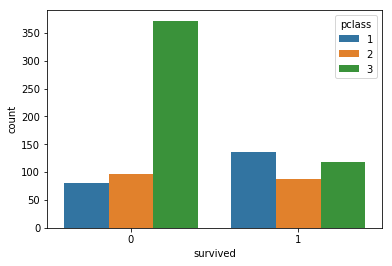

In [11]:
sns.countplot(x='survived',hue='pclass',data=df)

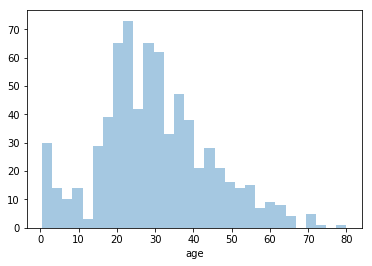

In [28]:
sns.distplot(df['age'].dropna(),kde=False,bins=30)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           714 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      889 non-null object
adult_male    891 non-null bool
deck          203 non-null category
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(2)
memory usage: 58.7+ KB


In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


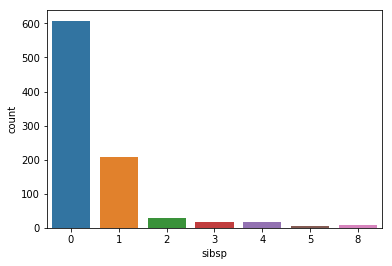

In [14]:
sns.countplot(x='sibsp',data=df)

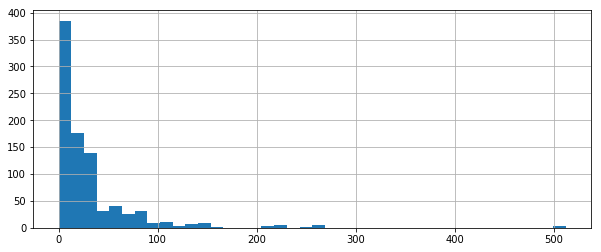

In [15]:
df['fare'].hist(bins=40,figsize=(10,4))

## Cleaning Data

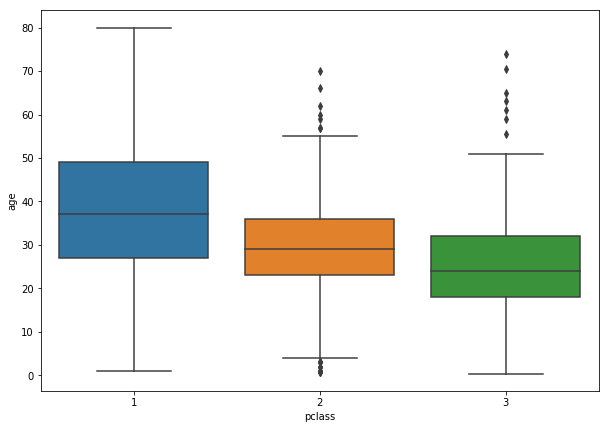

In [16]:
# Umur berdasarkan kelas
plt.figure(figsize=(10,7))
sns.boxplot(x='pclass',y='age',data=df)

In [17]:
def isi_umur(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else: 
        return age

In [18]:
df['age']=df[['age','pclass']].apply(isi_umur,axis=1)

In [19]:
df.drop('deck',axis=1,inplace=True)

In [20]:
df.dropna(inplace=True)

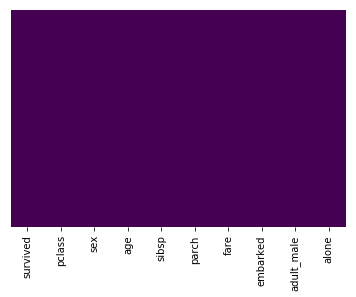

In [21]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [22]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'adult_male', 'alone'],
      dtype='object')

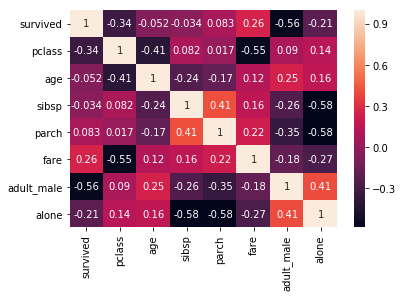

In [25]:
sns.heatmap(df.corr(),annot=True)

## One Hot Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label =  